# Table of Contents
* [Linear Regression](#Linear-Regression)
	* [Why Model Data?](#Why-Model-Data?)
	* [Why Linear Regression?](#Why-Linear-Regression?)
* [Confounding Linear Regression and Least Squares](#Confounding-Linear-Regression-and-Least-Squares)
	* [What is Linear Regression?](#What-is-Linear-Regression?)
	* [What is Least Squares?](#What-is-Least-Squares?)
* [Confounding Linear Combinations and Linear Functions](#Confounding-Linear-Combinations-and-Linear-Functions)
	* [Linear Combinations](#Linear-Combinations)
	* [Linear Functions](#Linear-Functions)
* [Explore the Data](#Explore-the-Data)
	* [Are $x$ and $y$ Related?](#Are-$x$-and-$y$-Related?)
	* [Variance](#Variance)
	* [Covariance](#Covariance)
	* [Correlation with `numpy`](#Correlation-with-numpy)
	* [Correlation with `pandas`](#Correlation-with-pandas)
	* [Correlation with Scipy](#Correlation-with-Scipy)
* [Model the Data](#Model-the-Data)
	* [Goodness of Fit](#Goodness-of-Fit)
	* [Error or "Loss" Functions](#Error-or-"Loss"-Functions)
	* [Residuals](#Residuals)
	* [Standard Error](#Standard-Error)
	* [Manually Minimize Errors](#Manually-Minimize-Errors)
* [Least Squares: Think Optimization of $a_n$](#Least-Squares:-Think-Optimization-of-$a_n$)
	* [Minimization of the Residual Sum of the Squares](#Minimization-of-the-Residual-Sum-of-the-Squares)
	* [Analytic Solution](#Analytic-Solution)
	* [Total = Explained + Residual](#Total-=-Explained-+-Residual)
	* [R-Squared](#R-Squared)
* [Linear Regression: Think Statistical Inference of $y_n$](#Linear-Regression:-Think-Statistical-Inference-of-$y_n$)
	* [Simulating Many Measurements](#Simulating-Many-Measurements)
	* [Regression to the Mean](#Regression-to-the-Mean)
	* [Estimation](#Estimation)
	* [Linear Regression seems more complex. Why bother?](#Linear-Regression-seems-more-complex.-Why-bother?)
	* [Computational Solutions](#Computational-Solutions)
* [Top Ten Methods for Linear Regression](#Top-Ten-Methods-for-Linear-Regression)
	* [Linear Regression with analytic solution](#Linear-Regression-with-analytic-solution)
	* [Linear Regression with `numpy.polyfit`](#Linear-Regression-with-numpy.polyfit)
	* [Linear Regression with `numpy.linalg`](#Linear-Regression-with-numpy.linalg)
	* [Linear Regression with `scipy.stats`](#Linear-Regression-with-scipy.stats)
	* [Linear Regression with `scipy.optimize`](#Linear-Regression-with-scipy.optimize)
	* [Linear Regression with `statsmodels`](#Linear-Regression-with-statsmodels)
	* [Linear Regression with `statsmodels.formula` and `pandas`](#Linear-Regression-with-statsmodels.formula-and-pandas)
	* [Linear Regression with `scikit-learn`](#Linear-Regression-with-scikit-learn)
	* [Linear Regression with Tensor Flow, gradient descent](#Linear-Regression-with-Tensor-Flow,-gradient-descent)
	* [Linear Regression with TensorFlow, machine learning](#Linear-Regression-with-TensorFlow,-machine-learning)
* [Conclusion](#Conclusion)


# Linear Regression

## Why Model Data?

Why build a model?
* **interpolation**: (find values in between points, resample your data)
* **extrapolation**: (prediction/forecast/backcast: find values outside range of points)
* **compression**: (store model parameters instead of large data table)
* **understanding**: (finding trends can reveal something deeper about the process that generates the data)

## Why Linear Regression?

Why learn and use linear regression?
* useful procedure for fitting and two variables that appear correlated
* used frequently to fit data that appears to have a linear trend
* a good example that provides a foundation for understanding 2 subjects at the same time: 
    1. statistical modeling and 
    2. optimization problems.
    3. prelude to other regression modeling (regularized and multivariant)
    4. prelude to other statistical modeling and machine learning

# Confounding Linear Regression and Least Squares

These two terms are often confounded, treated as if they are both alternate terms for simply "fitting a line to some data". We need to directly address common confusion over these names and what they label.

* In the physical sciences, fitting a linear line to data that appears to have a linear trend is usually called "least squares". 
* In social sciences and statistics, what appeasr to be the same procedure is usually called 'linear regression". 
* Ultimately, the two phrases do NOT mean precisely the same thing. 
* Although they are often used interchangeably, they are two different things that happen to be tightly coupled as they are very very often used together. 

Herein we'll touch a little on how they are connected and also try to "deconfound" or "disambiguate" the two.

To do this, it is extremely helpful to start with a discussion of the mechanics of how to do modeling with least-squares, including how some of the math works. 
* Doing so is useful because it is the simplest example of a linear modeling technique that has an analytic solution.
* That solution provides a nice framework to build up some of the concepts that are helpful for the more complex models where an analytic solution is not possible. 
* More complex models can almost always only be solved computationally
* Developing the concepts and some intuition is easier if we start with a simple example where the math works out cleanly.

## What is Linear Regression?

* Linear Regression is method of modeling
* Using models that are **linear** in the parameters
* In linear regression, the model may have the unsolved form of $y = a_0x^0 + a_1x^1 + a_2x^2 + a_3x^3$, and the solved form of $y = 0.5 + 1.7x + 0.003x^2 + 0.0000009x^3$
* one view: the $a_n$ are the coefficients of the features $x_n$
* another view: the $a_n$ are parameters and $x_n$ are "dimensions"
* $y$ then can be seen as a **linear combination** of the "features" or "dimensions". Remember linear algebra?
* The trick is to find the parameters $a_n$ while only allowing linear **powers** of $a_n$, not $a_n^2$ or worse!
* Linear regression is linear in the **parameters** $a_0$, $a_1$, $a_2$, etc, but need not be limited to linear relationships between the **variables** $x$ and $y$

## What is Least Squares?

* Least Squares is one of many ways to estimate specific values for the parameters in a Linear Regression model.
* Least Squares is what is often used to find the values for $a_0, a_1, a_2, ...$ in a linear regression model.
* Least Squares applies a specific "loss function" to constrain the values for the model parameters
* The most common use case for Least Squares is in the context of a Linear Regression where the parameters beyond $a_0$ and $a_1$ are assumed to be very small, because you suspect there is a linear relationship between $x$ and $y$


# Confounding Linear Combinations and Linear Functions

The *"linear"* in "Linear Regression" refers to the linearity of the parameters $a_0$ and $a_1$ in the model $f(a_0, a_1, x_n)$. The word "linear" does ***NOT*** refer to the linearity of $x_n$ in $f(a_0, a_1, x_n)$. The model $f$ can be non-linear in $x_n$, but if it is still linear in the parameters, the method is still called "linear regression. You could use $f(a_0, a_1, x) = a_0 + a_1x + a_2x^2$ as the model family and then minimize the same sum to solve for specific values of $a_0, a_1, a_2$


* more reading: https://en.wikipedia.org/wiki/Linear_model#Linear_regression_models

## Linear Combinations

The "linear" in "linear regression" refers not so much to lines and linear functions, but to "linear combinations" or "linear superpositions":

Example: position of a particle in 3 dimenions, along 3 axes:

$$\vec{x} = a_1\hat{x_1} + a_2\hat{x_2} + a_3\hat{x_3}$$

Example: velocity of a particle in 3 dimensions:

$$\vec{v} = v_x\hat{x} + v_y\hat{y} + v_z\hat{z}$$

Example: rotation in 2 dimenions as a combination of sinusoids:

$$\vec{p}(t) = (R\cos{\omega t})\hat{x} + (R\sin{\omega t})\hat{y} $$

Example: Taylor Series expansion

$$ \exp(x) = \sum_{n=0}^{\infty}{\frac{x^n}{n!}} = \frac{1}{0!}x^0 + \frac{1}{1!}x^1 + \frac{1}{2!}x^2 + \frac{1}{3!}x^3 + \dots$$

## Linear Functions

Linear Regression with Least Squares is used very commonly to model data where 2 variables appear to have a linear relationship.

It's not just over-simplification nor just taking the easy way out. The world is filled with linear trends. 
* Physics provides a good context to explain.
* Their are two primary mental models used in the physics of motion
    * Forces
    * Energy
* There are two common ways to look at their relationship:
    * Forces applied over time change how things move and change their energy
    * Energy differences between nearby points in space result in a force on things moving between those points.
* A metaphor to help: a marble in the bottom of a "harmonic" bowl
    * the shape of the bowl may be complex, but in a small region near the bottom it can likely be modeled by a upwards turned parabola $E \sim k x^2$
    * near the bottom of the bowl the potential energy is lowest, and up on the sides, it's higher. A marble released on the side will roll down to the bottom. A marble released on the bottom does not move.
    * a marble rolling up and down the sides experiences that as a force $F \sim -kx$, linear in $x$ that increases linearly up the sides, as we move a distance $x$ away from the bottom of the bowl.
* Since any dip in an "energy surface" can be roughly approximated as a parabola, $E \sim kx^2$, and the force is related to the change in energy in space (derivative), $F \sim -\delta E \sim -kx$, the linear forces appear all over physics.
* This metaphor from physics -- of local minima in energy surfaces resulting in linear forces that drive change near those minima -- is used in many other fields like biology and economics.
* No matter how complex the reality, if you can constrain yourself to care about a small enough local neighborhood around some minima, linear models will work.

# Explore the Data

* Before we fit the data using a least squares constraint, we can use the techniques from quantitative EDA to check whether the variables $x$ and $y$ are correlated.
* Would be nice to pick a real data set, but the randomly generated set works well for explaining the estimation part of linear regression.

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(num_pts=101, a0=-4, a1=2, mu=0, sigma=1):
    x = numpy.linspace(0,10,num_pts)
    e = numpy.array([numpy.random.normal(mu,sigma) for n in range(num_pts)])
    y = a0 + (a1*x) + e
    return x,y

In [3]:
def plot_data(X_data, Y_data):
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(X_data, Y_data,  label="data",  color="black", linestyle="",  marker="o")
    axis.set_ylabel("Y Data")
    axis.set_xlabel("X Data")
    axis.grid("on")
    return fig, axis

Always plot your data! https://en.wikipedia.org/wiki/Anscombe%27s_quartet

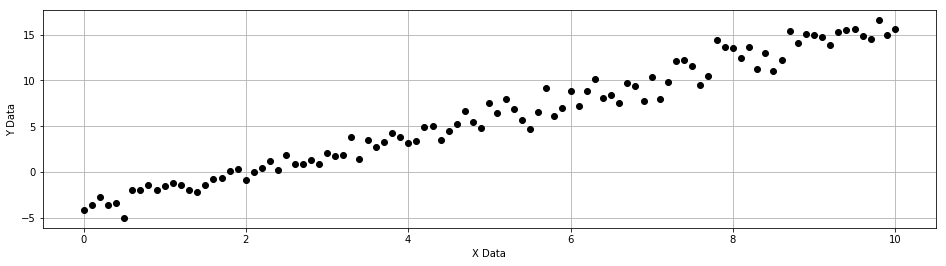

In [4]:
x, y = load_data()
plot_data(x, y,);

## Are $x$ and $y$ Related?

Review of discussion from previous course on statistics (quantitative EDA) the three summary statistics as a way to ease into least squares.
* variance    = Independent variability of 1 thing
* covariance  = Comparison of the variability of 2 things due to the codependence
* correlation = Comparison of the variability due to the codependence, scaled by the product of the independenet variability of the 2 things separately


$$Var(x) = \sigma_{xx} = \frac{\sum_{n=1}^{N} (x_{n} - \bar{X})^2}{(N-1)}$$

$$Cov(x,y) = \sigma_{xy} = \frac{\sum_{n=1}^{N} (x_{n} - \bar{X})(y_{n} - \bar{Y})}{(N-1)}$$

$$ Corr(x,y) = \rho_{xy} = \frac{\sigma_{xy}}{\sigma_x\sigma_y} =  \frac{Cov(x,y)}{\sqrt{Var(x)}\sqrt{Var(y)}} $$


## Variance

In [5]:
numpy.var(y)

35.84141329426167

In [6]:
numpy.var(x)

8.5

## Covariance

In [7]:
# Covariance
numpy.cov(x, y)

array([[  8.585     ,  17.3823723 ],
       [ 17.3823723 ,  36.19982743]])

## Correlation with `numpy`

In [8]:
# Correlation [[(xx), (xy)], [(yx), (yy)]]
numpy.corrcoef(x, y)

array([[ 1.        ,  0.98601983],
       [ 0.98601983,  1.        ]])

In [9]:
numpy.corrcoef(x, y)[0, 1]

0.98601982649542352

## Correlation with `pandas`

In [10]:
import pandas as pd
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df.head()

,x,y
0,0.0,-4.149952
1,0.1,-3.567963
2,0.2,-2.760798
3,0.3,-3.604734
4,0.4,-3.385028


In [11]:
df.corr()

,x,y
x,1.00000,0.98602
y,0.98602,1.00000


## Correlation with Scipy

In [12]:
from scipy.stats.stats import pearsonr

In [13]:
pearson_r, p_value = pearsonr(x,y)
print(pearson_r)

0.986019826495


# Model the Data

Before jumping immediately to Least Squares or Linear Regression, let's try to model the data by guessing and explore how good we can guess by applying some commonly used measures of "goodness of fit".

The analytic solution to least squares is know, and covered later in this notebook. Here we apply it to fit a line to our data. This procedure is very commonly taught in undergraduate and courses in science and used frequently throughout observational and experimental science.

In [14]:
def model_guess(x_data, a0, a1):
    x_min = numpy.min(x_data)
    x_max = numpy.max(x_data)
    num_pts = 101
    x_model = numpy.linspace(x_min, x_max, num_pts)
    intercept = a0
    slope = a1
    y_model = slope*x_data + intercept
    return y_model

In [15]:
def plot_data_model(X_data, Y_data, Y_model):
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(X_data, Y_data,  label="data",  color="black", linestyle="",  marker="o")
    axis.plot(X_data, Y_model, label="model", color="red",   linestyle="-", marker="")
    axis.legend()
    axis.grid("on")
    return fig, axis

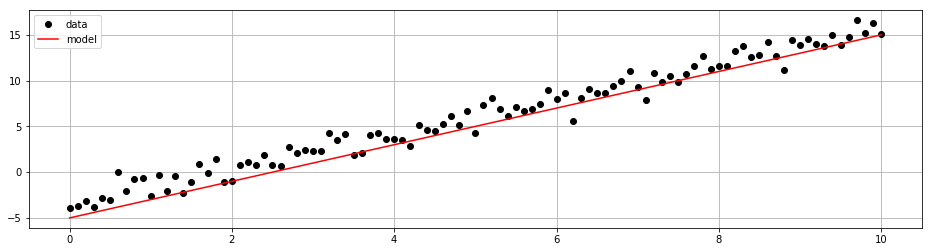

In [16]:
# try different values for a0, a1, examine the resulting fit visually
x, y = load_data()
f = model_guess(x, a1=2, a0=-5)
plot_data_model(x, y, f);

## Goodness of Fit

How do we measure, quantitatively, whether or chosen model is any good? Let's compare several different candidate error functions, or what later we'll call "cost" functions.

In [17]:
x, y = load_data()
f = model_guess(x, a1=2, a0=-5)

## Error or "Loss" Functions

In [18]:
def error_residuals(y_data, y_model):
    return numpy.sum( y_data - y_model )

In [19]:
error_residuals(y, f)

108.96268565468193

In [20]:
def error_squares(y_data, y_model):
    return numpy.sum( (y_data - y_model)**2 )

In [22]:
error_squares(y, f)

205.43865966218115

In [23]:
def error_root_squares(y_data, y_model):
    return numpy.sqrt(numpy.sum( (y_data - y_model)**2 ))

In [24]:
error_root_squares(y, f)

14.333131537182695

In [25]:
def error_root_mean_squares(y_data, y_model):
    rss = numpy.sum( (y_data - y_model)**2 )
    err = numpy.sqrt( rss/len(y_data) )
    return err

In [26]:
error_root_mean_squares(y, f)

1.4261998931668451

## Residuals

In [32]:
def residuals(y_data, y_model):
    return (y_data - y_model)

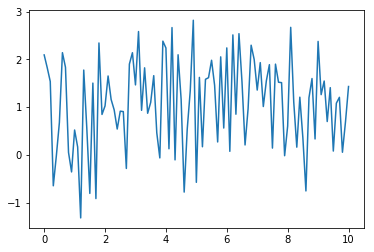

In [34]:
plt.plot(x, residuals(y, f))

In [36]:
def square_residuals(y_data, y_model):
    return (y_data - y_model)**2

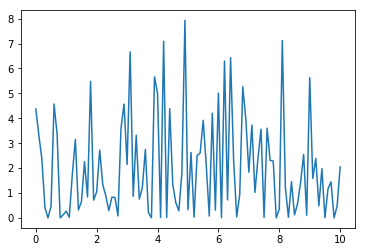

In [37]:
plt.plot(x, square_residuals(y, f))

## Standard Error

In [28]:
def std_err(y_data, y_model):
    rss = numpy.sum( (y_data - y_model)**2 )
    err = numpy.sqrt( rss/len(y_data) )
    return err

In [29]:
standard_error = std_err(y,f)
standard_error

1.4261998931668451

## Manually Minimize Errors

Try many different values for b, m to see which set of values gives you the best "goodness of fit"

In [38]:
x, y = load_data()

1.3817680286122918

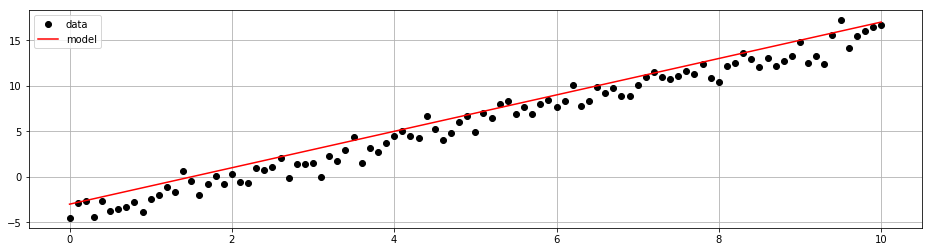

In [39]:
f = model_guess(x, a0=-3, a1=2)
plot_data_model(x, y, f)
std_err(y, f)

# Least Squares: Think Optimization of $a_n$

The "least" in "least squares" tells us this is a ***minimization*** or "optimization" game: the "squares" in "least squares" hints at the form of the "loss function" that we're trying to nudge towards it's "least" possible value.
* The thing we want to minimize is some measure of error in how well the model mimics the data.
* The best case scenario would be all the data points lie on the model line and so the distance from each point to the line is ZERO. So the sum of all those "errors" is also zero.
* The larger the sum of the distances, the worse the model.
* Large errors in the positive and negative directions should NOT cancel each other out.
* So the measure of error selected for the model fit is the sum of the square of the vertical distances.
* Minimizing this measure of error gives the parameter values that when plugged into the general model equation define a single model.

Given some measured data in a table $(x,y)$, we'd like "fit" the data with a model. We start by deciding that we'll try to fit some form or linear model to our data. A linear model that has the form:

$$f(x,a_0,a_1) = a_0 + a_1x$$

But this doesn't define a single model. It defines an entire family of models. To get a specific model, we have to chose "optimal" values for $a_0$ and $a_1$. How do we select the "optimal" values for $(a_0, a_1)$? Well, not every value will result in a good "fit" to the data. We have to find a way to pick the values of $a_0$ and $a_1$ that result in the "best" fit, as determining by some measure.

The goal is to come up with a method for selecting the "optimal" values of $a_0, a_1$, so that for example:

$$a_0 = 1$$

$$a_1 = 2$$

$$f(x) = 1 + 2x$$

So in order to "optimize" or model $f(a_0, a_1)$ to fit a given data set, we need to define what we mean by "optimal". What is the measure of "optimal"? Usually this is stated as minimizing of something called a "loss function", which is just some measure of "error" in the model. Error is though of as the difference between the model and the data, for every comparison of the model $f(a_0, a_1, x_n)$ to a data point $y_n(x_n)$ for all points, $n = 0,1,...,N$.

Least-squares fitting is called "least-squares" because the "optimal" fit $f(a_0,a_1)$ is ***defined*** as the one that yields the smallest possible value for the "sum of the squares". Which squares? In this case, the "loss function" $L$ is just chosen to be the sum of the squares of the vertical distance $\Delta y$ between the data $y$ and the model $f(x,a_0,a_1)$: 

$$L = \sum_n (\Delta y_n)^2$$

$$\Delta y_n = y_n - f(x_n)$$

In statistics, a "residual" is the difference between an observed value and a predicted value:

$$r_n = \Delta y_n$$

So then the loss $L$ is 

$$L = \sum r_n^2 = \sum_n (y_n - f(x_n))^2$$

So the goal is to minimize the sum of the squared residuals. The term "residual sum of squares" or "RSS" is often used.

The sum of the squares of residuals, "residual sum of squares (RSS)", is...

> a measure of the discrepancy between the data and an estimation model; Ordinary least squares (OLS) is a method for estimating the unknown parameters in a linear regression model, with the goal of minimizing the differences between the observed responses in some arbitrary dataset and the responses predicted by the linear approximation of the data. -- https://en.wikipedia.org/wiki/Residual_sum_of_squares

> So RSS is a measure of how good the model approximates the data while OLS is a method of constructing a good model.

Why not just use $\Delta y_n$ instead of $(\Delta y_n)^2$ for the measure of error? For our overall error measure to make any sense, large height differences should not cancel out if one $\Delta y_n$ is positive and one is negative.

Notice that since the model is a function of $a_0$ and $a_1$, then so is the error, and then so is the sum $S$:

$$\Delta y_n = y_n - f(a_0, a_1, x_n)$$

$$L(a_0, a_1) = \sum [\Delta y_n(a_0, a_1)]^2 = \sum_n^N [y_n - (a_0 + a_1x_n)]^2$$

So the game is to find the specific values of $a_0, a_1$ that give the smallest possible value of $L(a_0, a_1)$ when compared to any other values input for $a_0, a_1$. If you remember calculus, a common way to find the minimum value of a function was to take a derivative, set it to zero $\delta L = 0$, and solve for a parameter value. You can take derivatives of $L(a_o, a_1)$ with respect to $a_0$ and $a_1$, and set those derivatives to zero, $\delta L/\delta a_0 = 0$ and $\delta L/\delta a_1 = 0$, and use a bit of algebra to find the analytic solution for $a_0$ and $a_1$.

$$a_1 = \frac{  \sum_{n=1}^{N} (x_{n} - \bar{X})(y_{n} - \bar{Y})  }{ \sum_{n=1}^{N} (x_{n} - \bar{X})^2  } $$

$$a_0 = \bar{Y} - a_1 \bar{X}$$

where $\bar{X}$ is the mean value of $x$: $$\bar{X} = \frac{\sum_{n=1}^{N}x_{n}}{N}$$

Notice the $a_1$ is the covariance of x and y normalized by the variance of x.

$$Cov(x,y) = \frac{\sum_{n=1}^{N} (x_{n} - \bar{X})(y_{n} - \bar{Y})}{(N-1)}$$

$$Var(x) = \frac{\sum_{n=1}^{N} (x_{n} - \bar{X})^2}{(N-1)}$$

$$a_1 = \frac{ Cov(x,y) } {Var(x)}$$

It turns out that the optimal regression line will always pass through the point $(\bar{X}, \bar{Y})$ and the sum of the (linear) residuals will always be ZERO: 

$$\sum_n r_n = 0 $$

A useful physical metaphor is that the residuals are like masses placed on either end of a bar (the fit line) that balances on a pivot point $(\bar{X}, \bar{Y})$, and the masses on the left and right must balance each other out. The "moment arm" increases as the distance from the pivot increases, so smaller residuals out on the end have a greater influence over the slope of the fit line than do residuals closer to the pivot. This can be seen in the covariance term $(x_{n} - \bar{X})(y_{n} - \bar{Y})$ if you think of the residual $(y_{n} - \bar{Y})$ as the mass and $(x_{n} - \bar{X})$ as the moment arm length, or horizontal distance from the "center of mass"

## Minimization of the Residual Sum of the Squares

Least Squares has the "cost" function imbedded in it's name: find the parameters that result is the smallest or "least" value possible for the "squares" of the residuals.

In [41]:
def rss(y_data, y_model):
    rss = numpy.sum( (y_data - y_model)**2 )
    return rss

In [42]:
# RSS = residual sum of the squares
rss(y, f)

192.837571374405

In [43]:
# Variance of the residuals
numpy.var(y - f)

0.7893852213120568

Notice that the variance is the average RSS. SO then we could define an error that is the $\sqrt{RSS}$...

## Analytic Solution

In [44]:
def model_least_squares(x,y):
    X_bar = numpy.sum(x)/len(x)
    Y_bar = numpy.sum(y)/len(y)
    m = numpy.sum( (x - X_bar)*(y - Y_bar) )/numpy.sum( (x - X_bar)**2 )
    b = Y_bar - (m*X_bar)
    return m, b

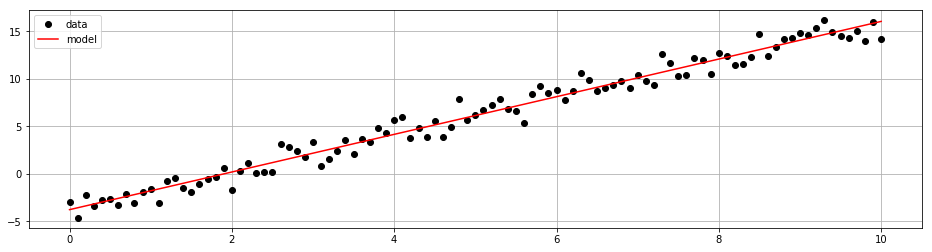

In [46]:
x, y = load_data()
m, b = model_least_squares(x, y)
f = m*x + b
plot_data_model(x, y, f);

## Total = Explained + Residual

In [47]:
# Total Sum of the Squares
def tss(y):
    y_mean = numpy.sum(y)/len(y)
    tss = numpy.sum( (y - y_mean)**2 )
    return tss

In [48]:
# Explained Sum of the Squares]
def ess(y, f):
    y_mean = numpy.sum(y)/len(y)
    ess = numpy.sum( (f - y_mean)**2 )
    return ess

In [49]:
# Residual Sum of the Squares
def rss(y, f):
    rss = numpy.sum( (f - y)**2 )
    return rss

## R-Squared

Another measure of the goodness of fit is $R^2$, the square of the correlation

https://en.wikipedia.org/wiki/Coefficient_of_determination

In [50]:
def r_square(y,f):
    return ess(y,f)/tss(y)

In [51]:
def F_stat(y,f):
    return ess(y,f)/( rss(y,f)/ (len(y) - 2) )

# Linear Regression: Think Statistical Inference of $y_n$

The way to describe "Linear Regression" is as follows: for a given $x_n$, while you only measured a single $y_n$, there is actually a *distribution* of possible values $y_n$. The inference problem is to determine this distribution. Imagine that the single measured value $y_n$ found by a single measurement at $x_n$ was actually just a single "draw" or "sample" from a larger underlying population distribution of possible values. Imagine tiny little guassian bell curves, one at each point $x_n$, each bell spreading out NOT HORIZONTALLY IN X BUT VERTICALLY IN Y, so vertically bells along the $y$ direction. 

For some $x_n$, the measured $y_n$ is in the middle of the bell, at the peak of it's underlying bell, but for others it's off-center. So we interpret the scatter of $y_n$ values about the fit line as natural random variation coming from our random draws, our observations, of the underlying distributions. And our prediction for the *mean* of each of those distributions we are sampling from is given by the linear model $a_0 + a_1x_n$. 

The goal in linear regression can then be seen as being an attempt to *estimate* the underlying distribution $y_{n,i}$ at point $x_n$, by using the *mean* of the samples as the "estimator" statistic to estimate the underlying distribution. So then the single value $y_n$, given by $y_n = a_0 + a_1x_n$, is the *mean* value of the underlying distribution of many values at a single $x_n$. 

$$\mu \{Y|X\} = a_0 + a_1X$$

The mean of $Y$, conditioned on $X$ is given by $a_0 + a_1X$.

The fit line will reveal the mean values for the underlying distributions of $y$. The process of minimizing the RSS, in a way, causes the solution to "regress" to the mean.

https://en.wikipedia.org/wiki/Regression_toward_the_mean#History

> The concept of regression comes from genetics and was popularized by Sir Francis Galton during the late 19th century with the publication of Regression towards mediocrity in hereditary stature.[9] Galton observed that extreme characteristics (e.g., height) in parents are not passed on completely to their offspring. Rather, the characteristics in the offspring regress towards a mediocre point (a point which has since been identified as the mean). By measuring the heights of hundreds of people, he was able to quantify regression to the mean, and estimate the size of the effect. 

## Simulating Many Measurements

If we just do a single measurement run, we might expect to see something like this:

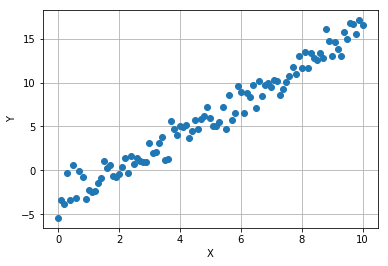

In [52]:
fig, axis = plt.subplots()
x, y = load_data()
axis.plot(x,y, linestyle="", marker="o")
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("X");

What if we do a hundred of these runs. We can simulate many runs, as some have called "hacker statistics". We could do this using bootstrapping, but here we'll just call `load_data()` a generate new data sets. What we're about to do is very analogous to the bootstapping procedure used previously. Under-the-hood, `load_data()` is called `numpy.random.gauss()` everytime.

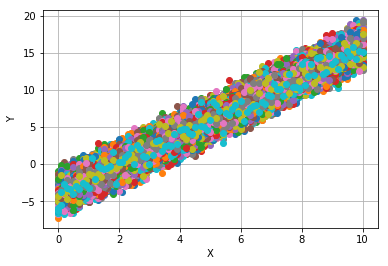

In [53]:
fig, axis = plt.subplots()
for n in range(0,1000):
    x, y = load_data()
    axis.plot(x,y, linestyle="", marker="o")
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("X");

## Regression to the Mean

Let's look at a single value of $x$... that is, what is $y$ conditioned on $x$?

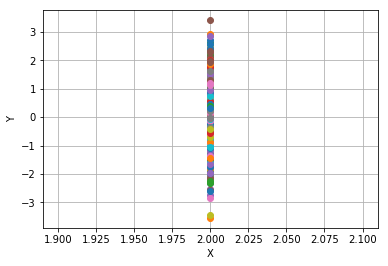

In [54]:
fig, axis = plt.subplots()
for n in range(0,1000):
    x, y = load_data()
    axis.plot(x[20],y[20], linestyle="", marker="o")
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("X");

And let's use a histogram to visualize that vertical $y$ distribution...

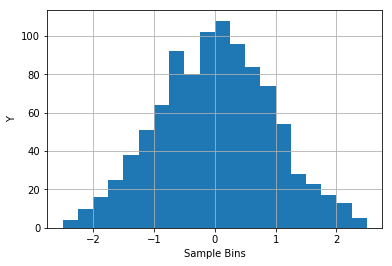

In [55]:
y_samples = []
for n in range(0,1000):
    x, y = load_data()
    y_samples.append(y[20])

fig, axis = plt.subplots()
plt.hist(y_samples, bins=numpy.linspace(-2.5,+2.5, 21))
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("Sample Bins");

Or if you prefer to avoid all the binning problems associated with histograms, let's use a CDF instead...

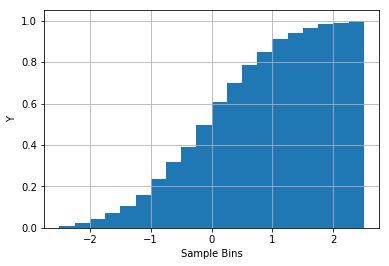

In [56]:
y_samples = []
for n in range(0,1000):
    x, y = load_data()
    y_samples.append(y[20])

fig, axis = plt.subplots()
plt.hist(y_samples, bins=numpy.linspace(-2.5,+2.5, 21), normed=True, cumulative=True)
axis.grid("on")
axis.set_ylabel("Y")
axis.set_xlabel("Sample Bins");

This is roughly the underlying distribution of $y_n$ conditioned on $x_n$.

## Estimation

This mean value $y_n$ is the "estimator" of that distribution, in the sense that we can use it to reconstruct a specific gaussian curve. But how do we do that? Well we have to get the variance from somewhere -- you cannot build a gaussian without knowing both mean and variance ($\mu$,$\sigma$) -- so we take a leap and **ASSUME** that every single distribution hiding at each of the many values of $x_n$, that they all have the **SAME VARIANCE**. How does that help? Well then we can treat the variance of $y$ values as seen across **MANY** locations $x$ as being identical to the variance of the underlying distribution at a **SINGLE** location $x_n$. So then now we have the *mean* and the *variance* at for each distribution at each $x_n$, and thus we can construct the guassian at that point.

If the distribution of the residuals is gaussian, and every distribution, one at each point $x_n$ is also gaussian, and they all have the same **variance** (spread), then it turns out that Least Squares is the condition that gives you the best fit possible. ***THAT*** is why we see Least Squares used so often. It's very often the best you can do! These assumptions are often unknowingly and unconsciously made. While they often happen to be true, when they are not, using OLS would NOT result the optimal fit!

## Linear Regression seems more complex. Why bother?

Thinking about the problem as an estimation makes it easier to answer questions such as how much of the trend in a scattering of data is the actual linear line and how much is random variation characterized by those "vertical" distributions in y?

Talk about measures of how good the estimation/fit turned out. Talk about correlation coefficient.

The **correlation coefficient** gives the fraction that is due to the trend, and the rest is due to "randomness" of the distribution in y values at a given x.

Plot the residuals to check whether the assumptions that went into the modeling are correct. The residuals should be normally distrinbuted with constant variance.

## Computational Solutions

For a simple model like $f(a_0, a_1, x) = a_0 + a_1x$, we can find an analytic solution for $a_0, a_1$ that minimizes some measure of error, for how well the model fits the data, and we can do this without a computer, using a simple bit of calculus and some algebra.

But for more complex models, an analytic solution is often impossible. The formula cannot be found.  In these cases a solution can only be found using ***computational methods***. These computational methods are implemented in python libraries such as **`scipy`**, **`statsmodels`**, and **`scikit-learn`**.

# Top Ten Methods for Linear Regression

1. `numpy`, using the analytic formula
2. `numpy.polyfit`, using `deg=1`
3. `numpy.linalg`, using `lstsq()` method 
4. `scipy.stats`, using the `linregress()` method
5. `scipy.optimize`, using the `curve_fit()` method
6. `statsmodels.api`, using `OLS()` method
7. `statsmodels.formula.api`, using formula string API with `pandas.DataFrame()`
8. `sklearn.linear_model`, using the `LinearRegression` class.
9. `tensorflow`, using `GradientDescentOptimizer`
10. `tensorflow`, using `GradientDescentOptimizer`, train-test-split

## Linear Regression with analytic solution

In the simple case of ("Ordinary" or "Linear") Least-Squares fitting, minimizing the vertical distances can be done analytically. So solving the optimization problem can be done analytically. For more complex models, there may be no analytic solution, and the only approach possible is numeric.

Let's encapsulate the analytic solution in a function, and follow a procedure that will look familiar with more complex tools and models latter when only computational methods will work.

In [57]:
def model(x,y):
    X_bar = numpy.sum(x)/len(x)
    Y_bar = numpy.sum(y)/len(y)
    m = numpy.sum( (x - X_bar)*(y - Y_bar) )/numpy.sum( (x - X_bar)**2 )
    b = Y_bar - (m*X_bar)
    return m, b

In [58]:
x, y = load_data()
X_data = x
Y_data = y
slope, intercept = model(X_data, Y_data)
X_model = x
Y_model = slope*x + intercept

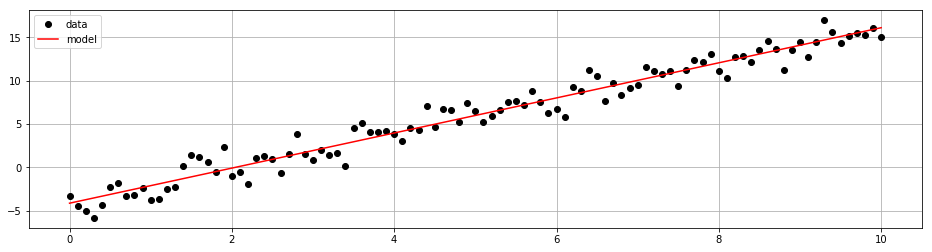

In [59]:
plot_data_model(X_data, Y_data, Y_model);

## Linear Regression with `numpy.polyfit`

In [60]:
import numpy

In [61]:
x, y = load_data()
X_data = x
Y_data = y

In [62]:
a1, a0 = numpy.polyfit(x, y, deg=1)

In [63]:
X_model = X_data
Y_model = a0 + a1*X_model

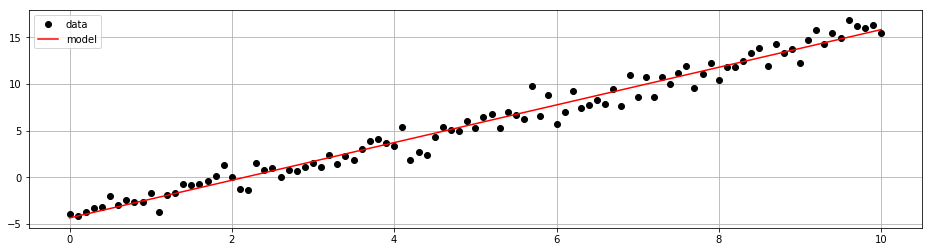

In [64]:
plot_data_model(X_data, Y_data, Y_model);

## Linear Regression with `numpy.linalg`

In [65]:
import numpy

In [66]:
x, y = load_data()
X_data = x
Y_data = y

In [67]:
A_data = numpy.vstack([X_data, numpy.ones(len(X_data))]).T

a1, a0 = numpy.linalg.lstsq(A_data, Y_data)[0]

In [68]:
X_model = X_data
Y_model = a1*X_data + a0

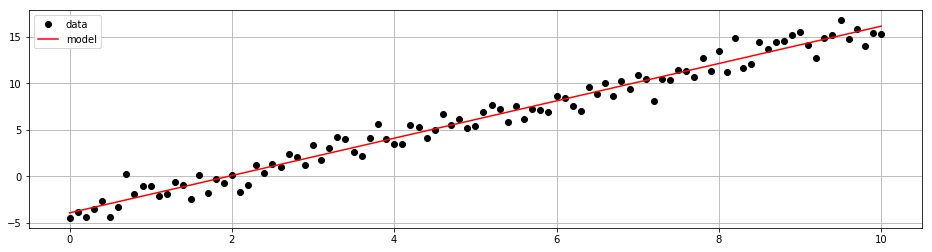

In [69]:
plot_data_model(X_data, Y_data, Y_model);

## Linear Regression with `scipy.stats`

In [70]:
from scipy import stats

In [71]:
x, y = load_data()
X_data = x
Y_data = y

In [72]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X_data, Y_data)
X_model = X_data
Y_model = slope*X_data + intercept

In [73]:
print("slope = {}, intercept = {}".format(slope, intercept))
print("r_value = {}, p_value = {}, std_err = {}".format(r_value, p_value, std_err))

slope = 2.0037452175590196, intercept = -3.990385239590922
r_value = 0.9869014780745171, p_value = 2.957120729097286e-80, std_err = 0.03291928654328089


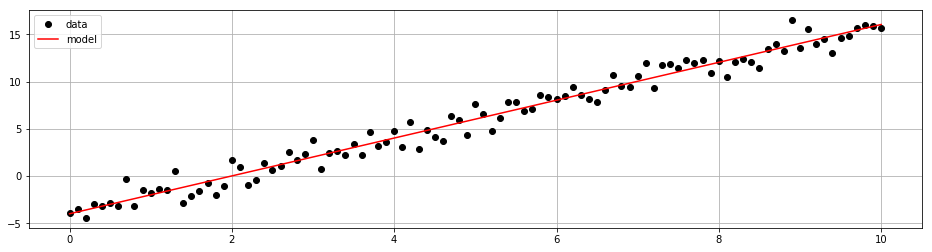

In [74]:
plot_data_model(X_data, Y_data, Y_model);

## Linear Regression with `scipy.optimize`

In [75]:
from scipy import optimize

In [76]:
x, y = load_data()
X_data = x
Y_data = y

In [77]:
def model_func(x, a, b):
    return a + (b*x)

In [78]:
param_opt, param_cov = optimize.curve_fit(model_func, X_data, Y_data)

intercept = param_opt[0]  # think a0 as in a0 + a1*x
slope     = param_opt[1]  # think a1 as in a0 + a1*x
std_err   = numpy.sqrt(numpy.diag(param_cov))

In [79]:
print("slope = {}, intercept = {}".format(slope, intercept))
print("covariance = {}".format(param_cov))
print("std_err = {}".format(std_err))

slope = 1.9884821446421461, intercept = -3.953677554321243
covariance = [[ 0.04984209 -0.00743912]
 [-0.00743912  0.00148782]]
std_err = [ 0.22325341  0.03857232]


In [80]:
Y_model = model_func(X_data, intercept, slope)
X_model = X_data

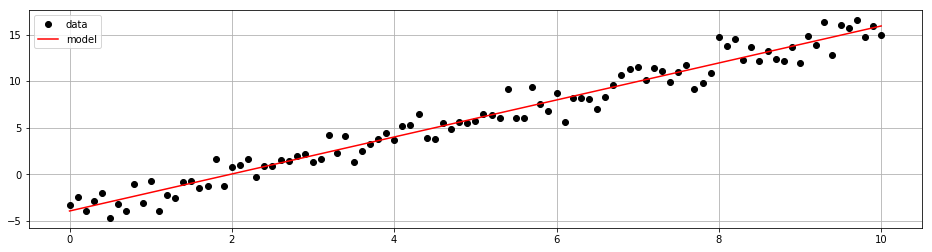

In [81]:
plot_data_model(X_data, Y_data, Y_model);

## Linear Regression with `statsmodels`

For more exmaples, see http://www.statsmodels.org/dev/examples/index.html#regression

In [85]:
import statsmodels.api as sm

In [86]:
# Note: statsmodels cannot handle a pandas DataFrame.index object, so convert to integer days

# df = load_data()
# X_data = (df.index - df.index[0]).days
# Y_data = df[col_name]

In [87]:
x, y = load_data()
X_data = x
Y_data = y

In [88]:
X_const   = sm.add_constant(X_data)
model     = sm.OLS(Y_data,X_const)
model_fit = model.fit()

In [89]:
intercept = model_fit.params[0]
slope     = model_fit.params[1]
print("slope = {}, intercept = {}".format(slope, intercept))

slope = 2.0060865025468577, intercept = -3.9766835031126067


In [90]:
X_model = X_data
Y_model = slope*X_data + intercept

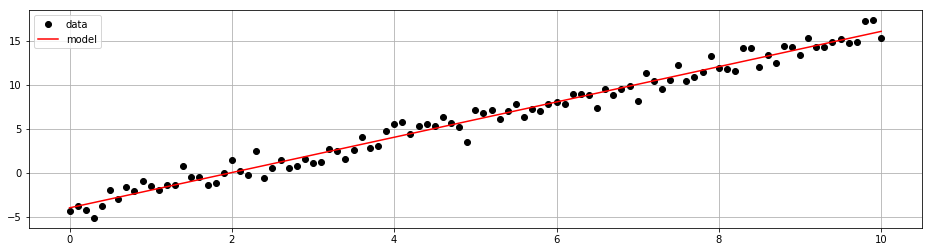

In [91]:
plot_data_model(X_data, Y_data, Y_model);

In [92]:
model_fit.cov_params()

array([[ 0.03017321, -0.00450346],
       [-0.00450346,  0.00090069]])

In [93]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     4468.
Date:                Sat, 05 Aug 2017   Prob (F-statistic):           3.46e-84
Time:                        09:36:26   Log-Likelihood:                -129.32
No. Observations:                 101   AIC:                             262.6
Df Residuals:                      99   BIC:                             267.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9767      0.174    -22.893      0.000      -4.321      -3.632
x1             2.0061      0.030     66.844      0.000       1.947       2.066
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.459
Skew:                           0.089   Prob(JB):                        0.795
Kurtosis:                       2.722   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression with `statsmodels.formula` and `pandas`

For more exmaples, see http://www.statsmodels.org/dev/examples/index.html#regression

In [94]:
import statsmodels.formula.api as smf
import pandas

In [95]:
x, y = load_data()
X_data = x
Y_data = y
df = pandas.DataFrame(dict(x=X_data, y=Y_data))

In [96]:
model = smf.ols(formula="y ~ x", data=df).fit()

In [97]:
Y_model = model.predict(df)
X_model = X_data

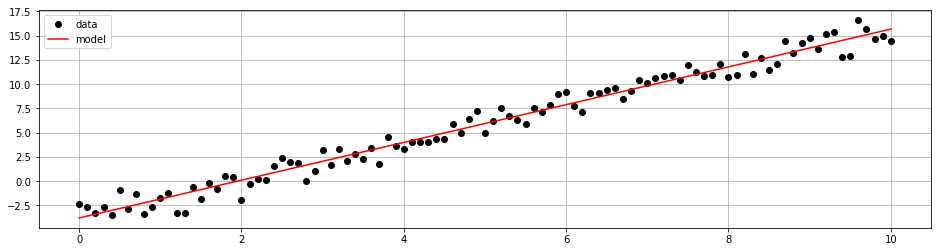

In [98]:
plot_data_model(df.x, Y_data, Y_model);

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     3933.
Date:                Sat, 05 Aug 2017   Prob (F-statistic):           1.65e-81
Time:                        09:36:34   Log-Likelihood:                -132.70
No. Observations:                 101   AIC:                             269.4
Df Residuals:                      99   BIC:                             274.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7883      0.180    -21.090      0.000      -4.145      -3.432
x              1.9464      0.031     62.716      0.000       1.885       2.008
==============================================================================
Omnibus:                        3.591   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                2.515
Skew:                          -0.217   Prob(JB):                        0.284
Kurtosis:                       2.360   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression with `scikit-learn`

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
x, y = load_data()
X_data = x
Y_data = y

In [102]:
# Practice working with DataFrames and forcing the reshape needed for sklearn
df = pandas.DataFrame(dict(x=X_data, y=Y_data))
X_data = df.x.values.reshape(len(df.y),1)
Y_data = df.y.values.reshape(len(df.y),1)

In [103]:
model = LinearRegression(fit_intercept=True)
model.fit(X_data, Y_data)
Y_model = model.predict(X_data)

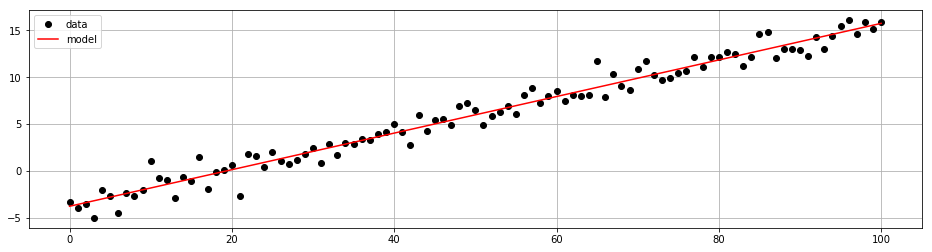

In [104]:
plot_data_model(df.index, Y_data, Y_model);

In [105]:
model.coef_

array([[ 1.95193975]])

In [106]:
model.intercept_

array([-3.7750762])

## Linear Regression with Tensor Flow, gradient descent

Thanks to a friend at TACC: https://github.com/jchuahtacc/MachineLearningRegression

In [107]:
# !conda install tensorflow -y

In [108]:
import tensorflow as tf

In [109]:
# Initial guesses for values of fit parameters
W = tf.Variable([+0.25])
b = tf.Variable([-0.25])

# Prealocate memory for regression solution
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [110]:
model = W*x + b
loss = tf.reduce_sum(tf.square(model - y))

In [111]:
optimizer = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

In [112]:
import numpy as np
import time

cheat_W = 2
cheat_b = -4

starting_value = 2
ending_value = 8
num_values = 100

def make_vals(starting_value, ending_value, num_values):
    # Let's make a bunch of x values
    x_vals = np.linspace(starting_value, ending_value, num_values)
    # Let's make a bunch of y values close to our equation, but randomly off by a small amount
    noise = np.random.uniform(-1, 1, num_values)
    target_loss = np.sum(np.square(noise))
    y_vals = cheat_W * x_vals + cheat_b + noise
    return x_vals, y_vals, abs(target_loss)

x_vals, y_vals, actual_loss = make_vals(starting_value, ending_value, num_values)

# Let's cheat again, and use numpy's built in linear regression
start = time.time()
actual_W, actual_b = np.linalg.lstsq(np.vstack([x_vals, np.ones(len(x_vals))]).T, y_vals)[0]
print("Cheating time:", time.time() - start) 

print("Actual loss:", actual_loss) 
print("Actual W:", actual_W) 
print("Actual b:", actual_b) 

Cheating time: 0.0007901191711425781
Actual loss: 28.4249201737
Actual W: 2.02742074185
Actual b: -4.18686241762


In [113]:
# Try changing the steps
steps = 4000

losses = steps * [ 0.0 ]
Ws = steps * [ 0.0 ]
bs = steps * [ 0.0 ]


def measure_time(algorithm, steps):
    start = time.time()
    algorithm(steps)
    return time.time() - start


def gradient_regression(epochs):
    from random import shuffle
    
    # import all our global variables and data
    global losses
    global Ws
    global bs
    global x_vals
    global y_vals
    
    # machine learning works better with random ordering
    coords = list( zip( x_vals, y_vals) )
    shuffle(coords)
    x_list, y_list = zip(*coords)
    
    # Start a tensorflow session
    session = tf.Session()
    session.run(tf.global_variables_initializer())
    
    # Create a data set to fit
    data = { x : x_list, y: y_list }
    
    # Run a bunch of epochs
    for i in range(epochs):
        # Run one generation and capture a snapshot of it
        _, output_loss, output_W, output_b = session.run([optimizer, loss, W, b], feed_dict=data)
        losses[i] = output_loss
        Ws[i] = output_W[0]
        bs[i] = output_b[0]


execution_time = measure_time(gradient_regression, steps)

print("Execution time:", execution_time) 
print("Actual regression: y = ", actual_W, " * x +", actual_b) 
print("Actual loss: ", actual_loss) 
print("Final regression: y =", Ws[steps - 1], " * x +", bs[steps - 1]) 
print("Final loss:", losses[steps - 1]) 

Execution time: 2.992849826812744
Actual regression: y =  2.02742074185  * x + -4.18686241762
Actual loss:  28.4249201737
Final regression: y = 2.02726  * x + -4.18599
Final loss: 27.9472


## Linear Regression with TensorFlow, machine learning

https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py

Epoch: 0050 cost= 0.137969106 W= 0.387731 b= -0.192283
Epoch: 0100 cost= 0.130919918 W= 0.379515 b= -0.13318
Epoch: 0150 cost= 0.124684989 W= 0.371788 b= -0.0775917
Epoch: 0200 cost= 0.119170301 W= 0.364521 b= -0.0253099
Epoch: 0250 cost= 0.114292666 W= 0.357685 b= 0.0238624
Epoch: 0300 cost= 0.109978527 W= 0.351257 b= 0.0701103
Epoch: 0350 cost= 0.106162846 W= 0.34521 b= 0.113608
Epoch: 0400 cost= 0.102788046 W= 0.339523 b= 0.154518
Epoch: 0450 cost= 0.099803217 W= 0.334175 b= 0.192995
Epoch: 0500 cost= 0.097163320 W= 0.329144 b= 0.229184
Epoch: 0550 cost= 0.094828516 W= 0.324413 b= 0.26322
Epoch: 0600 cost= 0.092763588 W= 0.319963 b= 0.295232
Epoch: 0650 cost= 0.090937324 W= 0.315778 b= 0.32534
Epoch: 0700 cost= 0.089322224 W= 0.311842 b= 0.353657
Epoch: 0750 cost= 0.087893814 W= 0.30814 b= 0.380291
Epoch: 0800 cost= 0.086630590 W= 0.304657 b= 0.40534
Epoch: 0850 cost= 0.085513435 W= 0.301383 b= 0.4289
Epoch: 0900 cost= 0.084525503 W= 0.298303 b= 0.451058
Epoch: 0950 cost= 0.08365181

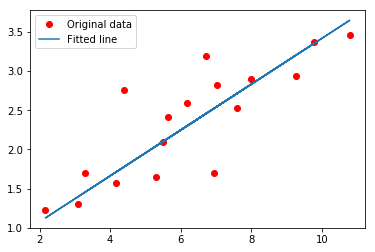

Testing... (Mean square loss Comparison)
Testing cost= 0.0771208
Absolute mean square loss difference: 0.0057584


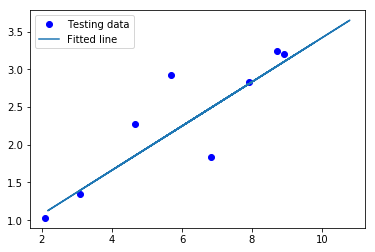

In [114]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# Conclusion